In [1]:
from pandas import *
from matplotlib.pyplot import *
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [2]:
atlas = read_csv('atlas.csv')

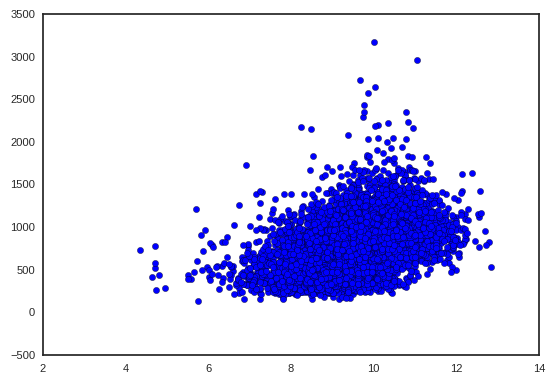

In [11]:
scatter('e_anosestudo', 'renocup', data=atlas);

In [14]:
from seaborn import *

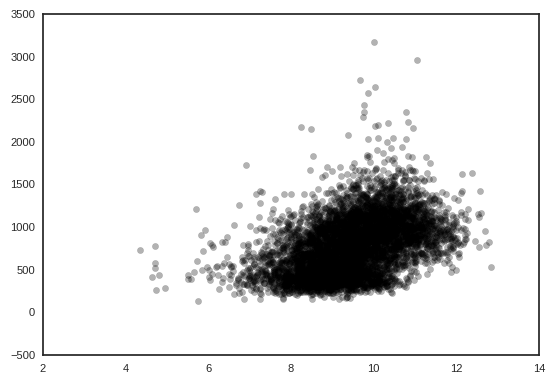

In [18]:
scatter('e_anosestudo', 'renocup', data=atlas, alpha=0.3, c='black');

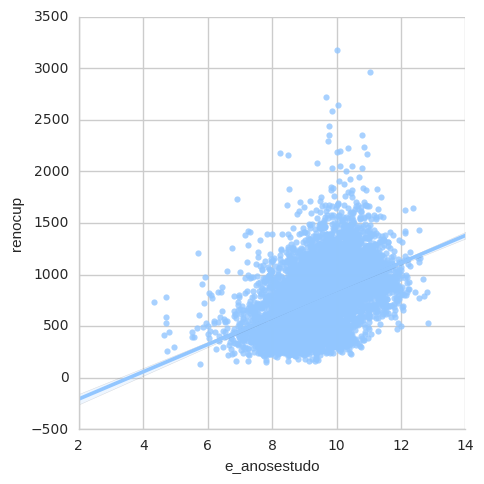

In [27]:
lmplot('e_anosestudo', 'renocup', atlas);

In [29]:
set(style="whitegrid", palette='deep', context='notebook') 
                                   # style (fundo): darkgrid (padrão, fundo cinza com grades), dark (sem grade), whitegrid (fundo branco), white
                                   # palette (brilho): deep (padrão), bright (ggplot), pastel, dark, muted, colorblind
                                   # context (tamanho): paper < notebook (padrão) < talk < poster        

Agora execute novamente os gráficos acima.

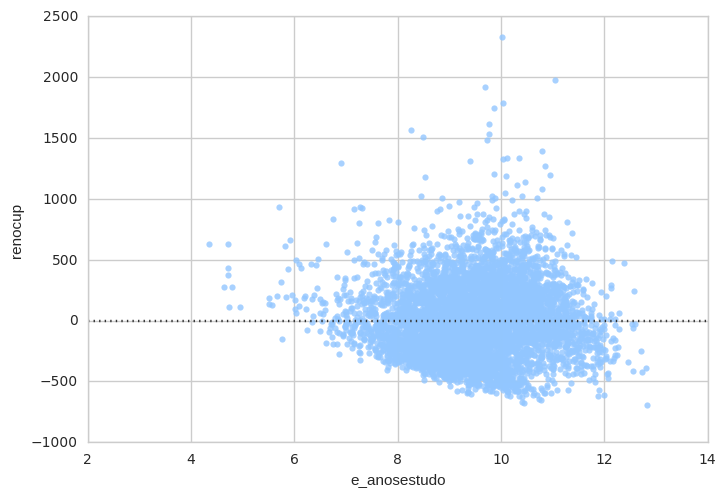

In [28]:
residplot('e_anosestudo', 'renocup', atlas);

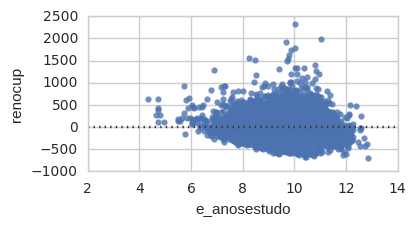

In [30]:
figure(figsize=(4,2))
residplot('e_anosestudo', 'renocup', atlas);

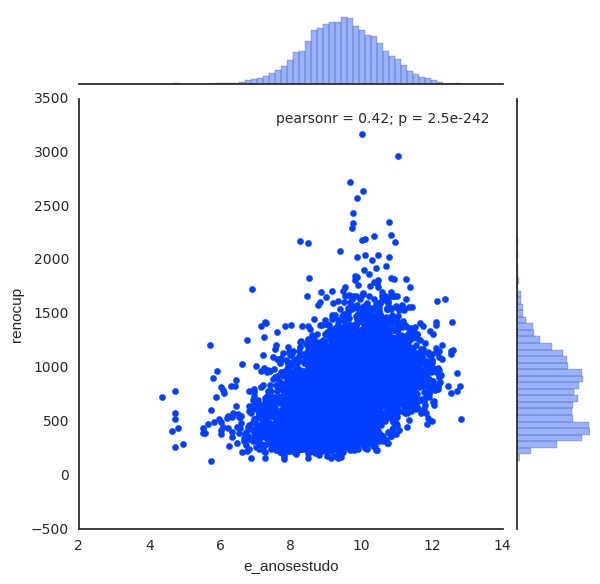

In [24]:
jointplot('e_anosestudo', 'renocup', atlas);

In [35]:
atlas2 = atlas.iloc[:, 10:13]

In [36]:
atlas3 = atlas[(atlas['nome_uf'] == 'são paulo') | (atlas['nome_uf'] == 'minas gerais')]

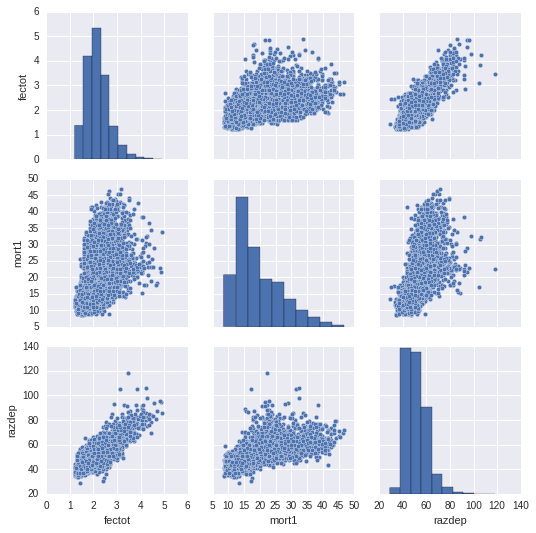

In [17]:
pairplot(atlas2);

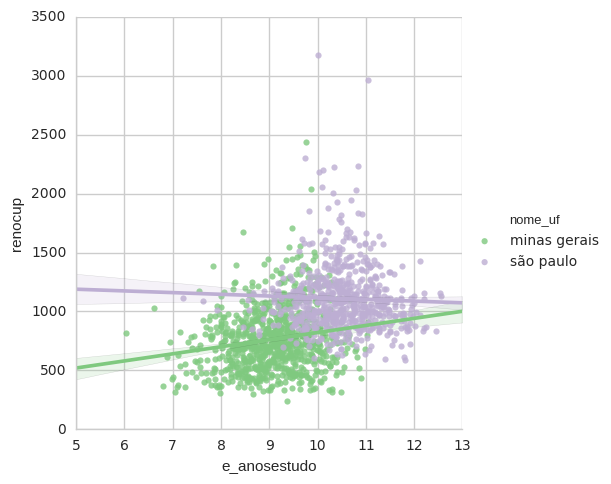

In [37]:
lmplot('e_anosestudo', 'renocup', hue='nome_uf', data=atlas3, palette="Accent");

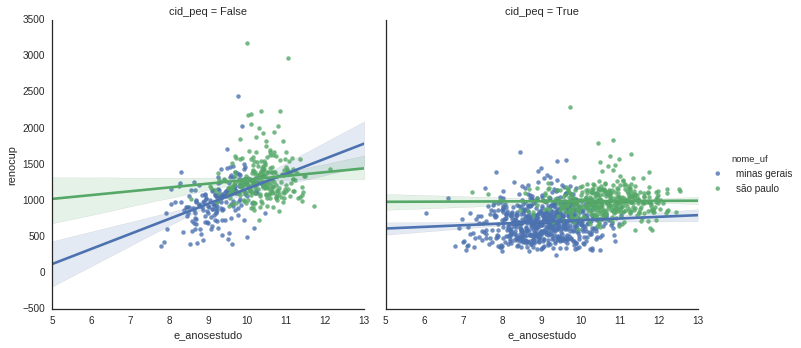

In [20]:
# para adicionar outra variável, indique coluna ou linha (row)
lmplot('e_anosestudo', 'renocup', hue='nome_uf', col='cid_peq', data=atlas3);

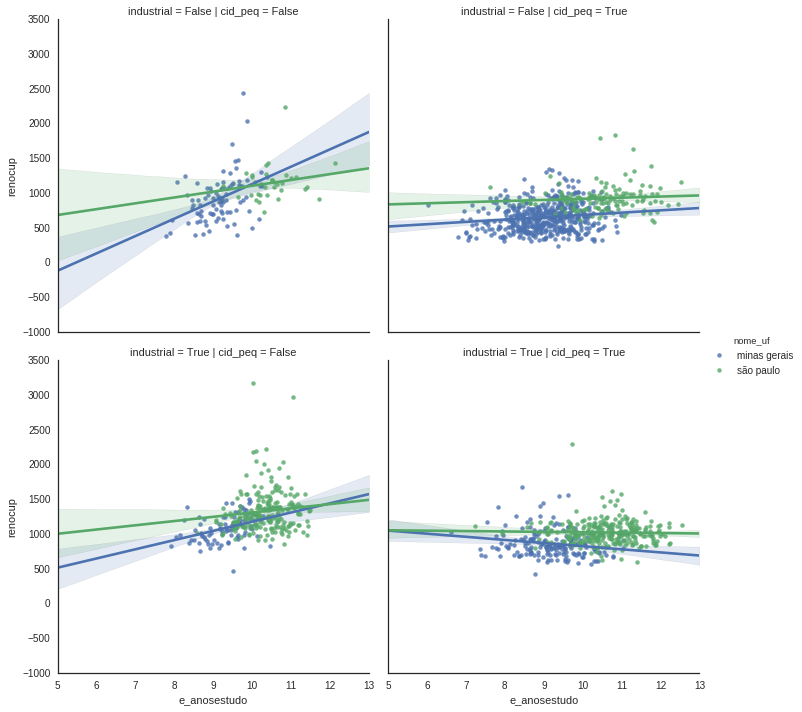

In [23]:
# criar nova variável categórica
atlas3['industrial'] = atlas3.p_transf > 10.15

# para adicionar outra variável, indique coluna ou linha (row)
lmplot('e_anosestudo', 'renocup', hue='nome_uf', col='cid_peq', row='industrial', data=atlas3);

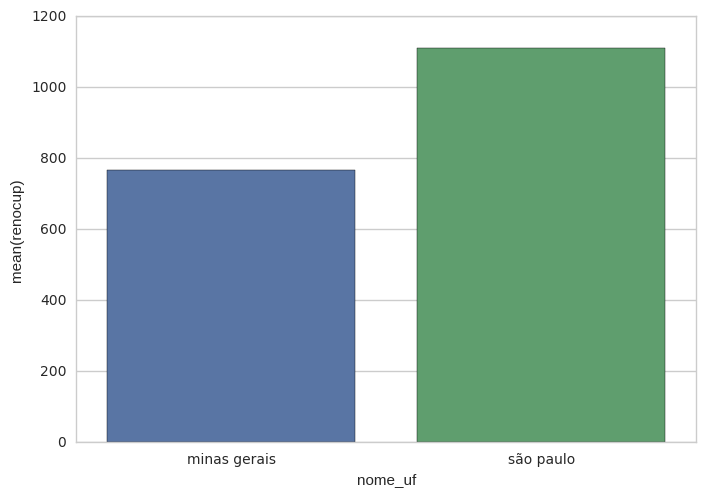

In [39]:
barplot('nome_uf', 'renocup', data=atlas3, ci=None); 

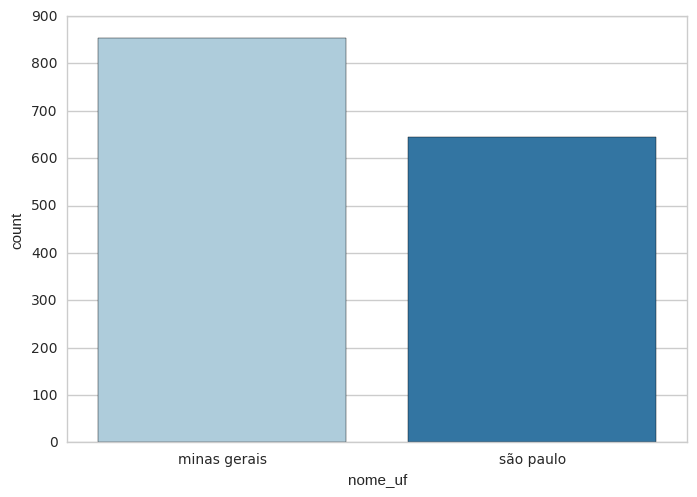

In [40]:
countplot('nome_uf', data=atlas3, palette='Paired');

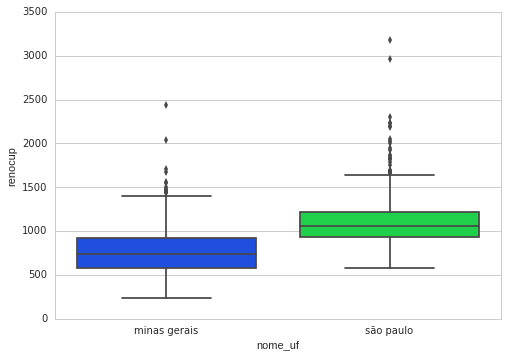

In [15]:
boxplot('nome_uf', 'renocup', data=atlas3);

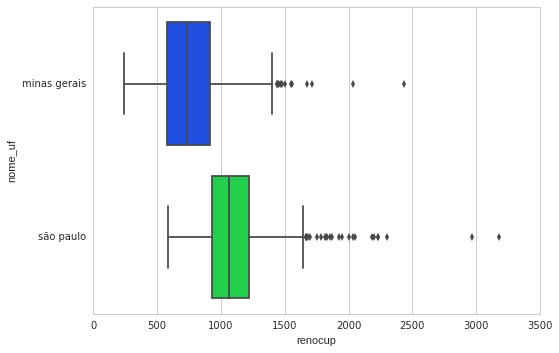

In [16]:
boxplot('renocup', 'nome_uf', data=atlas3);

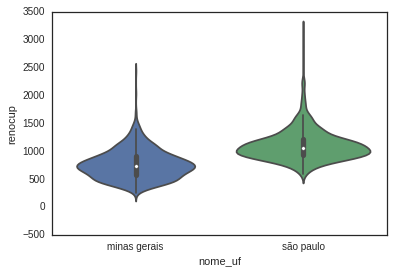

In [26]:
violinplot('nome_uf', 'renocup', data=atlas3);

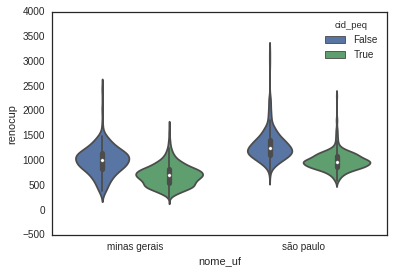

In [28]:
violinplot('nome_uf', 'renocup', hue='cid_peq', data=atlas3);

In [71]:
set_style("dark", {"axes.facecolor": ".2", 'grid.color': '.2'})

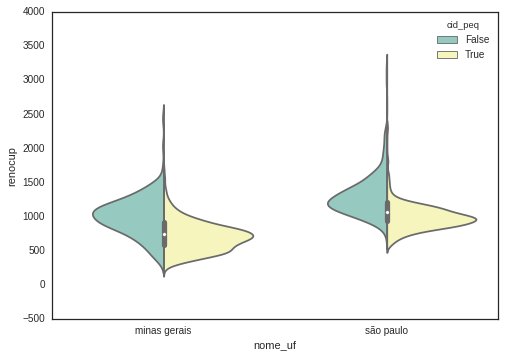

In [72]:
violinplot('nome_uf', 'renocup', hue='cid_peq', split=True, palette='Set3', data=atlas3);

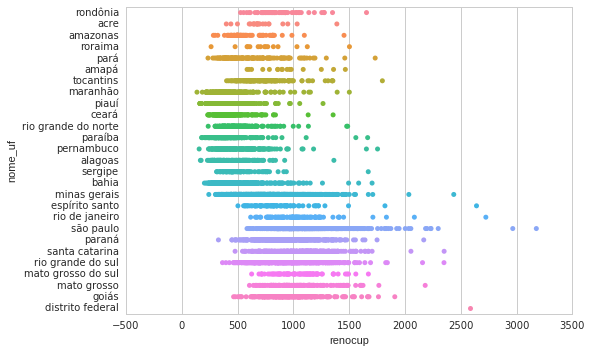

In [17]:
stripplot(atlas.renocup, atlas.nome_uf);

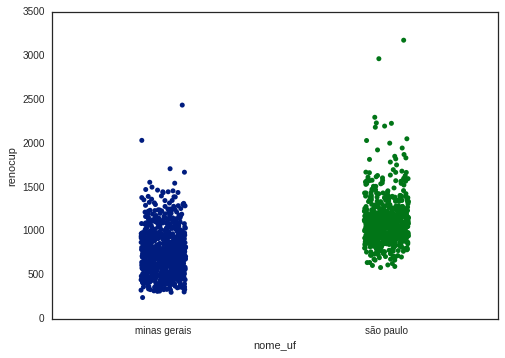

In [78]:
stripplot(atlas3.nome_uf, atlas3.renocup, jitter=True);

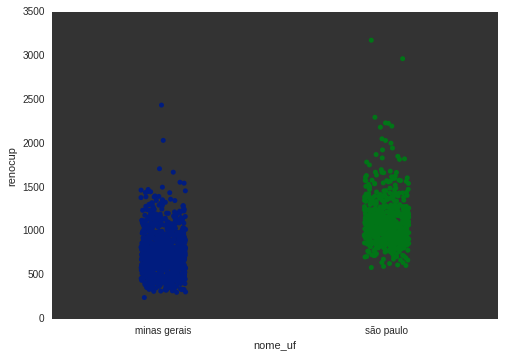

In [80]:
with axes_style("dark", {"axes.facecolor": ".2", 'grid.color': '.2'}): # definição contentual
    stripplot(atlas3.nome_uf, atlas3.renocup, jitter=True);

In [ ]:
set_style("dark", {"axes.facecolor": ".2", 'grid.color': '.2'}) # definição global

In [116]:
set_style("white")

In [42]:
import antigravity

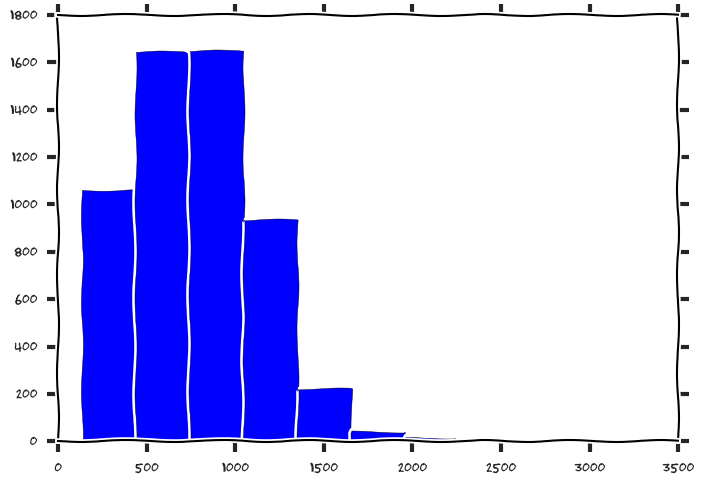

In [43]:
with xkcd():
    atlas.renocup.hist()


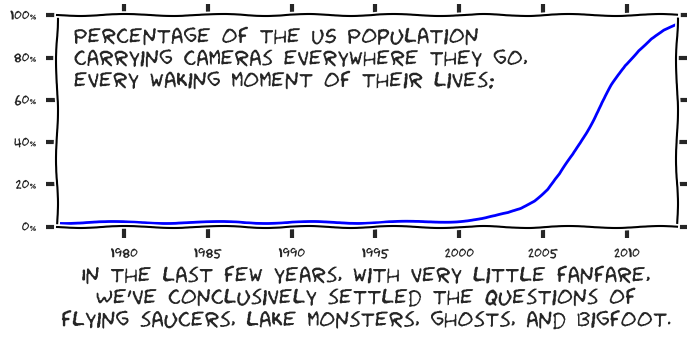

In [44]:
with xkcd():
    fig = figure(figsize=(8, 6))
    ax = fig.add_subplot(211)

    years = np.linspace(1975, 2013)
    pct = 2 + 98. / (1 + np.exp(0.6 * (2008 - years)))
    ax.plot(years, pct)

    ax.set_xlim(1976, 2013)
    ax.set_ylim(0, 100)
    ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%i%%'))

    ax.text(1977, 67,
        ("Percentage of the US Population\n"
         "carrying cameras everywhere they go,\n"
         "every waking moment of their lives:"),
        size=16)

    ax.set_xlabel(("In the last few years, with very little fanfare,\n"
               "We've conclusively settled the questions of\n"
               "flying saucers, lake monsters, ghosts, and bigfoot."),
              size=16);

# Manipulação de dataframes com Pandas

Antes disso, note que há um segundo tipo de célula: markdown. Como essas duas. Dessa maneira, é possível fazer a análise, os gráficos e os comentários em um mesmo documento. É também possível incluir citações:
> Todos os modelos estão errados, mas alguns são úteis (BOX, 1982)

E fórmulas:

$\bar{X} = \dfrac{1}{n}\displaystyle\sum_{i=1}^{n}X$

Bom, vamos deixar para nos aprofundar nisso depois. Voltemos aos códigos.

In [19]:
atlas.shape

(5565, 84)

In [21]:
atlas.head()

,uf,nome_uf,meso,nome_meso,micro,nome_micro,codmun6,codmun7,nome_mun,espvida,...,vab_total,impostos,pib,pibpc,agro,ind,ser,adm,imp,cid_peq
0,11,rondônia,1102,leste rondoniense,11006,cacoal,110001,1100015,alta floresta d'oeste,70.75,...,240988.49,20961.09,261949.58,10725.97,264.00,61.0,239.0,356.0,0.08,False
1,11,rondônia,1102,leste rondoniense,11003,ariquemes,110002,1100023,ariquemes,73.36,...,1196608.07,165039.15,1361647.21,15070.14,54.00,208.0,364.0,253.0,121.00,False
2,11,rondônia,1102,leste rondoniense,11008,colorado do oeste,110003,1100031,cabixi,70.39,...,65148.54,4048.58,69197.12,10968.00,351.00,46.0,181.0,364.0,59.00,True
3,11,rondônia,1102,leste rondoniense,11006,cacoal,110004,1100049,cacoal,74.27,...,1039127.94,145288.72,1184416.66,15068.72,0.08,152.0,393.0,252.0,123.00,False
4,11,rondônia,1102,leste rondoniense,11008,colorado do oeste,110005,1100056,cerejeiras,72.94,...,192226.84,29573.84,221800.68,13024.11,131.00,88.0,364.0,284.0,133.00,True


In [22]:
set_option('html', False)

In [23]:
atlas.head()

   uf   nome_uf  meso          nome_meso  micro         nome_micro  codmun6  \
0  11  rondônia  1102  leste rondoniense  11006             cacoal   110001   
1  11  rondônia  1102  leste rondoniense  11003          ariquemes   110002   
2  11  rondônia  1102  leste rondoniense  11008  colorado do oeste   110003   
3  11  rondônia  1102  leste rondoniense  11006             cacoal   110004   
4  11  rondônia  1102  leste rondoniense  11008  colorado do oeste   110005   

   codmun7               nome_mun  espvida   ...      vab_total   impostos  \
0  1100015  alta floresta d'oeste    70.75   ...      240988.49   20961.09   
1  1100023              ariquemes    73.36   ...     1196608.07  165039.15   
2  1100031                 cabixi    70.39   ...       65148.54    4048.58   
3  1100049                 cacoal    74.27   ...     1039127.94  145288.72   
4  1100056             cerejeiras    72.94   ...      192226.84   29573.84   

          pib     pibpc    agro    ind    ser    adm    

In [25]:
atlas.columns

Index(['uf', 'nome_uf', 'meso', 'nome_meso', 'micro', 'nome_micro', 'codmun6',
       'codmun7', 'nome_mun', 'espvida', 'fectot', 'mort1', 'razdep', 't_env',
       'e_anosestudo', 't_analf25m', 't_flbas', 't_flfund', 't_flmed',
       't_flpre', 't_flsuper', 'pind', 'pmpob', 'pren10ricos', 'pren20',
       'pren20ricos', 'pren40', 'pren60', 'pren80', 'r1040', 'r2040', 'rdpc',
       'cpr', 'emp', 'p_agro', 'p_com', 'p_constr', 'p_extr', 'p_formal',
       'p_fund', 'p_med', 'p_serv', 'p_siup', 'p_super', 'p_transf', 'ren0',
       'ren1', 'ren2', 'ren3', 'ren5', 'renocup', 'trabcc', 'trabpub',
       'trabsc', 't_agua', 't_banagua', 't_dens', 't_lixo', 't_luz', 'parede',
       't_m10a14cf', 't_m15a17cf', 't_mcff', 't_des', 't_fund25m', 't_med25m',
       't_super25m', 't_ativ', 'pop', 't_urb', 'vab_agro', 'vab_ind',
       'vab_ser', 'vab_adm', 'vab_total', 'impostos', 'pib', 'pibpc', 'agro',
       'ind', 'ser', 'adm', 'imp', 'cid_peq'],
      dtype='object')

In [26]:
atlas.renocup

0        950.08
1       1274.11
2        827.86
3       1277.37
4        926.57
5        931.16
6        680.68
7        723.83
8       1024.08
9       1002.67
10      1054.86
11      1254.37
12       713.98
13       793.58
14       987.42
15      1188.26
16      1655.47
17       899.79
18       910.90
19      1138.63
20       810.33
21      1351.07
22       809.23
23       676.79
24       877.59
25       603.29
26       787.74
27       807.57
28       527.10
29       871.69
         ...   
5535    1116.86
5536     724.82
5537     901.34
5538     936.56
5539     873.53
5540    1547.34
5541     921.15
5542    1143.80
5543    1102.21
5544     633.69
5545     536.77
5546     903.36
5547     651.38
5548     872.48
5549    1054.87
5550     953.02
5551     643.17
5552     899.34
5553     954.23
5554     725.66
5555    1389.74
5556     843.78
5557    1019.76
5558    1308.92
5559     871.49
5560    1110.12
5561    1114.20
5562     792.05
5563     666.51
5564    2581.69
Name: renocup, dtype: fl

In [27]:
atlas['renocup']

0        950.08
1       1274.11
2        827.86
3       1277.37
4        926.57
5        931.16
6        680.68
7        723.83
8       1024.08
9       1002.67
10      1054.86
11      1254.37
12       713.98
13       793.58
14       987.42
15      1188.26
16      1655.47
17       899.79
18       910.90
19      1138.63
20       810.33
21      1351.07
22       809.23
23       676.79
24       877.59
25       603.29
26       787.74
27       807.57
28       527.10
29       871.69
         ...   
5535    1116.86
5536     724.82
5537     901.34
5538     936.56
5539     873.53
5540    1547.34
5541     921.15
5542    1143.80
5543    1102.21
5544     633.69
5545     536.77
5546     903.36
5547     651.38
5548     872.48
5549    1054.87
5550     953.02
5551     643.17
5552     899.34
5553     954.23
5554     725.66
5555    1389.74
5556     843.78
5557    1019.76
5558    1308.92
5559     871.49
5560    1110.12
5561    1114.20
5562     792.05
5563     666.51
5564    2581.69
Name: renocup, dtype: fl

In [28]:
atlas.iloc[1:3, 18:20]

   t_flmed  t_flpre
1    37.07    40.96
2    42.14    58.34

In [32]:
atlas.query('renocup > 1000')

      uf           nome_uf  meso               nome_meso  micro  \
1     11          rondônia  1102       leste rondoniense  11003   
3     11          rondônia  1102       leste rondoniense  11006   
8     11          rondônia  1102       leste rondoniense  11006   
9     11          rondônia  1101         madeira-guaporé  11002   
10    11          rondônia  1102       leste rondoniense  11004   
11    11          rondônia  1102       leste rondoniense  11004   
15    11          rondônia  1102       leste rondoniense  11007   
16    11          rondônia  1101         madeira-guaporé  11001   
19    11          rondônia  1102       leste rondoniense  11006   
21    11          rondônia  1102       leste rondoniense  11007   
30    11          rondônia  1101         madeira-guaporé  11001   
31    11          rondônia  1101         madeira-guaporé  11001   
34    11          rondônia  1101         madeira-guaporé  11001   
57    12              acre  1201           vale do juruá  1200

In [34]:
mg = atlas.query('nome_uf == "minas gerais"')
mg.shape

(853, 84)

In [35]:
# agrupar e mostrar resumo estatítico de cada grupo
atlas['renocup'].groupby(atlas['nome_uf']).describe()

nome_uf              
acre            count      22.000000
                mean      723.009545
                std       209.592142
                min       399.220000
                25%       642.385000
                50%       678.815000
                75%       770.792500
                max      1389.790000
alagoas         count     102.000000
                mean      486.838333
                std       184.573424
                min       166.960000
                25%       341.275000
                50%       478.830000
                75%       589.715000
                max      1363.210000
amapá           count      16.000000
                mean      931.095625
                std       257.795852
                min       585.600000
                25%       770.440000
                50%       898.655000
                75%      1007.842500
                max      1465.800000
amazonas        count      62.000000
                mean      592.242258
                

In [36]:
# ver tamanho dos grupos
atlas.groupby('nome_uf').size()

nome_uf
acre                    22
alagoas                102
amapá                   16
amazonas                62
bahia                  417
ceará                  184
distrito federal         1
espírito santo          78
goiás                  246
maranhão               217
mato grosso            141
mato grosso do sul      78
minas gerais           853
paraná                 399
paraíba                223
pará                   143
pernambuco             185
piauí                  224
rio de janeiro          92
rio grande do norte    167
rio grande do sul      496
rondônia                52
roraima                 15
santa catarina         293
sergipe                 75
são paulo              645
tocantins              139
dtype: int64

In [37]:
# subselecionar
atlas.query('nome_uf == "minas gerais"').groupby('nome_meso').size()

nome_meso
campo das vertentes                  36
central mineira                      30
jequitinhonha                        51
metropolitana de belo horizonte     105
noroeste de minas                    19
norte de minas                       89
oeste de minas                       44
sul/sudoeste de minas               146
triângulo mineiro/alto paranaíba     66
vale do mucuri                       23
vale do rio doce                    102
zona da mata                        142
dtype: int64

In [38]:
atlas['renocup'].groupby(atlas['nome_uf']).quantile(0.9)

nome_uf
acre                    945.812
alagoas                 685.384
amapá                  1305.455
amazonas                816.831
bahia                   731.590
ceará                   630.907
distrito federal       2581.690
espírito santo         1191.304
goiás                  1257.235
maranhão                640.058
mato grosso            1437.170
mato grosso do sul     1357.454
minas gerais           1105.868
paraná                 1240.100
paraíba                 614.942
pará                    958.790
pernambuco              752.630
piauí                   588.569
rio de janeiro         1267.722
rio grande do norte     719.414
rio grande do sul      1304.480
rondônia               1183.297
roraima                1087.966
santa catarina         1348.642
sergipe                 759.546
são paulo              1426.652
tocantins               975.062
Name: renocup, dtype: float64

In [39]:
agrupado = mg.groupby(['nome_meso', 'nome_micro'])

agrupado['renocup'].mean()

nome_meso                         nome_micro              
campo das vertentes               barbacena                    650.985000
                                  lavras                       918.957778
                                  são joão del rei             836.814000
central mineira                   bom despacho                 949.299167
                                  curvelo                      697.046364
                                  três marias                  914.378571
jequitinhonha                     almenara                     495.161250
                                  araçuaí                      468.900000
                                  capelinha                    530.913571
                                  diamantina                   542.342500
                                  pedra azul                   553.424000
metropolitana de belo horizonte   belo horizonte              1122.057500
                                  conceição do mato d

# Regressão

In [40]:
from statsmodels.formula.api import ols

In [41]:
ols('renocup ~ p_agro + p_transf + pop', atlas).fit(). summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                renocup   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     1565.
Date:                Thu, 29 Sep 2016   Prob (F-statistic):               0.00
Time:                        11:08:40   Log-Likelihood:                -38659.
No. Observations:                5565   AIC:                         7.733e+04
Df Residuals:                    5561   BIC:                         7.735e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1059.1367     11.905     88.966      0.000      1035.798  1082.475
p_agro        -9.8897      0.229    -43.105      0.000       -10.339    -9.440
p_transf       6.8340      0.461     14.817      0.000         5.930     7.738
pop            0.0002    1.7e-05     11.850      0.000         0.000     0.000
==============================================================================
Omnibus:                     1039.286   Durbin-Watson:                   1.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2756.330
Skew:                           1.008   Prob(JB):                         0.00
Kurtosis:                       5.797   Cond. No.                     7.27e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
modelo = ols('renocup ~ p_agro + p_transf + pop', atlas).fit().summary()
print(modelo)

                            OLS Regression Results                            
Dep. Variable:                renocup   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     1565.
Date:                Thu, 29 Sep 2016   Prob (F-statistic):               0.00
Time:                        11:09:12   Log-Likelihood:                -38659.
No. Observations:                5565   AIC:                         7.733e+04
Df Residuals:                    5561   BIC:                         7.735e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1059.1367     11.905     88.966      0.0